# Week2授業前課題2
## ダミーデータの作成
機械学習に関するプログラムの実験を行う上で、実データではないランダムなデータ（ダミーデータ）が欲しいということがあります。正規分布に従う乱数によるダミーデータの作成を通じてNumPyの使い方になれていきましょう。

# 問題1
## 乱数の作成
平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

$$
\begin{bmatrix}
    1.0 & 0.8 \\
    0.8 & 1.0
\end{bmatrix}
$$

多次元の正規分布による乱数は`np.random.multivariate_normal()`を使うことで作成できます。

作成したndarrayのshapeは(500, 2)になります。

In [86]:
import numpy as np
np.random.seed(0)
mean = (-3, 0)
cov = [[1.0, 0.8], [0.8, 1.0]]
rand_number = 500
rand_dummy = np.random.multivariate_normal(mean, cov, rand_number)
print(np.shape(rand_dummy))

(500, 2)


# 問題2
## 散布図による可視化
問題1で作成したデータ点を散布図により可視化してください。

散布図はmatplotlibの`plt.scatter()`を使うことで描けます。

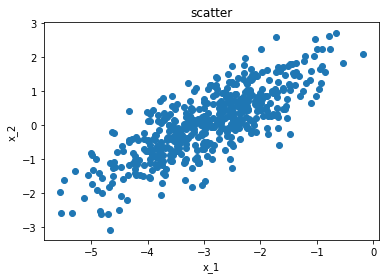

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('scatter')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.scatter([x[0] for x in rand_dummy], [y[1] for y in rand_dummy])
plt.show()

# 問題3
## ヒストグラムによる可視化
問題1で作成したデータをヒストグラムにより可視化してください。


ヒストグラムは`plt.hist()`を使うことで描けます。


各次元ごとに作成し、2つのヒストグラムとしてください。


それぞれのヒストグラムの横軸の範囲は`plt.xlim()`を用いて揃えるようにしてください。

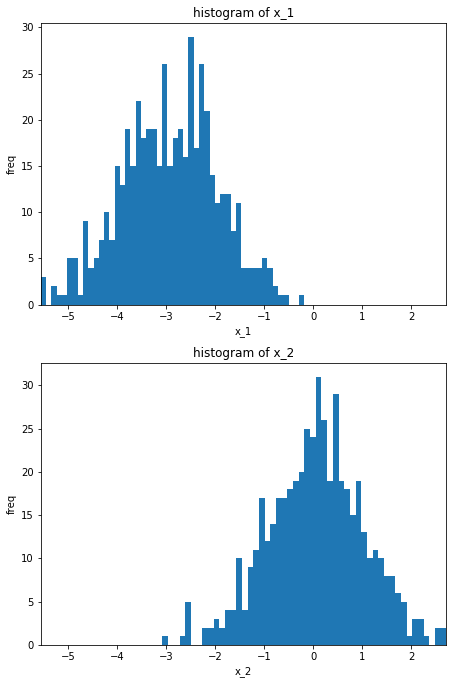

In [88]:
# rand_dummyの最大値・最小値を求める
rand_max = max(rand_dummy.flatten())
rand_min = min(rand_dummy.flatten())

%matplotlib inline
fig = plt.figure(figsize=(6.4, 9.6))
ax1 = fig.add_subplot(2, 1, 1, 
    title='histogram of x_1', xlabel='x_1', ylabel='freq', xlim=(rand_min, rand_max))
ax2 = fig.add_subplot(2, 1, 2, 
    title='histogram of x_2', xlabel='x_2', ylabel='freq', xlim=(rand_min, rand_max))

ax1.hist([x[0] for x in rand_dummy], bins=50)

ax2.hist([x[1] for x in rand_dummy], bins=50)

fig.tight_layout() 
plt.show()

# 問題4
## データの増加
新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

$$
\begin{bmatrix}
    1.0 & 0.8 \\
    0.8 & 1.0
\end{bmatrix}
$$

そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは **0** 、問題4のものは **1** を表示してください。

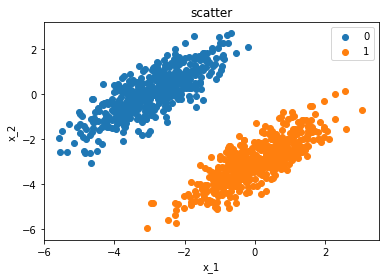

In [89]:
# 新規乱数の作成
mean_2 = (0, -3)
cov_2 = [[1.0, 0.8], [0.8, 1.0]]
rand_dummy_2 = np.random.multivariate_normal(mean_2, cov_2, rand_number)

# 散布図を描画する
fig = plt.figure()
ax = fig.add_subplot(111, title='scatter', xlabel='x_1', ylabel='x_2')
ax.scatter([x[0] for x in rand_dummy], [y[1] for y in rand_dummy], label=0)
ax.scatter([x[0] for x in rand_dummy_2], [y[1] for y in rand_dummy_2], label=1)
ax.legend()
plt.show()

# 問題5
## データの結合
データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを 結合 し、(1000, 2)のndarrayとしてください。結合は`np.concatenate()`や`np.vstack()`を使うことで行えます。

In [90]:
# np.concatenate()を使ってみる
rand_ndarray = np.concatenate((rand_dummy, rand_dummy_2), axis=0)
print(np.shape(rand_ndarray))

(1000, 2)


# 問題6
## ラベル付け
ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す ラベル 付けを行ってください。問題1のものには0、問題4のものには1を対応させます。


0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。


機械学習に使用するデータセットはこのような形になっていることが多いです。

In [91]:
# np.insert()でラベル列追加
# np.hstack()も試したが上手くいかず
rand_dummy_labeled = np.insert(rand_dummy, 2, 0, axis=1)
rand_dummy_2_labeled = np.insert(rand_dummy_2, 2, 1, axis=1)

# np.vstack()を使ってみる
rand_ndarray_labeled = np.vstack((rand_dummy_labeled, rand_dummy_2_labeled))
print(np.shape(rand_ndarray_labeled))

(1000, 3)
